
### NLP 시스템 RND

- NLP 를 활용하여 신문기사 추천 시스템 만들기 
- 참고 블로그 https://hipster4020.tistory.com/176           



🔸 Author : Forrest D Park

---
### 자연어처리를 위한 패키지 인스톨 
- text coloring (From Functions module)
- NLP install list
    - tweepy
    - konlpy
    - eunjeon (mecab)
    - datasets
    - pytorch
    - transformer 

In [1]:
## Forrest Park's notion 
### Service  Text Coloring option
def blue(str):
    from Functions import Service
    return Service.colored_text(str,'blue')
def yellow(str):
    from Functions import Service
    return Service.colored_text(str,'yellow')
def red(str):
    from Functions import Service
    return Service.colored_text(str,'red')
def green(str):
    from Functions import Service
    return Service.colored_text(str,'green')
## 자연어처리 패키지 설치 
def NLPInstalls():
    import subprocess,sys
    import warnings ; warnings.filterwarnings('ignore')
    # pip가 없으면 pip를 설치
    try:import pip
    except ImportError:
        print("Install pip for python3")
        subprocess.call(['sudo', 'apt-get', 'install', 'python3-pip'])
    
    # tweepy 없으면 tweepy 설치
    try:import tweepy        
    except ModuleNotFoundError:
        print("Install tweepy")
        subprocess.call([sys.executable, "-m", "pip", "install", 'tweepy==3.10.0'])
    finally:import tweepy 
    
    # konlpy 없으면 konlpy 설치
    try:import konlpy
    except ModuleNotFoundError: 
        print("Install konlpy")
        subprocess.call([sys.executable, "-m", "pip", "install", 'konlpy'])
    finally:import konlpy
    
    # eunjeon 없으면 eunjeon 설치
    try:import eunjeon
    except ModuleNotFoundError: 
        print("Install eunjeon : eunjeon")
        subprocess.call([sys.executable, "-m", "pip", "install", 'eunjeon'])
    finally:import konlpy
    
    # datasets 없으면 datasets를 설치
    try:import datasets
    except ModuleNotFoundError: 
        print("Install datasets : datasets")
        subprocess.call([sys.executable, "-m", "pip", "install", 'datasets'])
    finally:import datasets
    
    # pytorch 없으면 pytorch 설치
    try:import torch
    except ModuleNotFoundError: 
        print("Install torch : pytorch")
        subprocess.call([sys.executable, "-m", "pip", "install", 'pytorch'])
    finally:import torch
    
    # transformers 없으면 transformers 설치
    try:import transformers
    except ModuleNotFoundError: 
        print("Install transformer : transformers")
        subprocess.call([sys.executable, "-m", "pip", "install", 'transformers'])
    finally:import transformers
        
    # UMAP 없으면 UMAP 설치
    try:import umap
    except ModuleNotFoundError: 
        print("Install umap : umap")
        subprocess.call([sys.executable, "-m", "pip", "install", 'umap'])
    finally:import umap
        
    # UMAP 없으면 UMAP 설치
    try:from umap import UMAP
    except ImportError: 
        print("Install umap : umap-learn")
        subprocess.call([sys.executable, "-m", "pip", "install", 'umap-learn'])
    finally:import umap
    

    
   
NLPInstalls()
print(yellow(f"📌 - PROGRAM START \n\t"))
## GPU setting (in MacOS)
import torch
print(yellow(f"📌 - MPS 장치를 지원 Build 여부 : "),torch.backends.mps.is_built())
print(yellow(f"📌 - MPS 장치 사용가능 여부 : "),torch.backends.mps.is_available())
print(yellow(f"📌 - GPU 사용Start"))
device = torch.device("mps")
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



📌 - PROGRAM START 
	
📌 - MPS 장치를 지원 Build 여부 :  True
📌 - MPS 장치 사용가능 여부 :  True
📌 - GPU 사용Start


---
### [모델과 토크나이저 불러오기!]
- pytorch import 
- transformers 의 autoToknenizer 사용
- Model check point 적용 
- Transformers 의 autoModel 사용
- model 이 돌아가는 컴퓨터가 cpu 인지 gpu 인지 확인후 사양에 맞는 모델을 선택하는 과정 
 > 책 트랜스포머를 이용한 자연어처리 2.3 

In [2]:
## pytorch importing 
import torch
import torch.nn.functional as F
import warnings ; warnings.filterwarnings('ignore')
from transformers import AutoTokenizer
# from transformers import DistilBertTokenizer

## chkpt :  Hugging face 에 등록된 distilBert 언어 모델을 가져옴 .
model_ckpt = 'distilbert-base-uncased' 
print(yellow("🔸 model check point : "), model_ckpt)
## 토크나이저를 통해서 토큰화 작업.
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

## pretrained model  을 사용하려면 automodel importing,
from transformers import AutoModel
## pytorch 를 사용하여 GPU 사용 여부를 확인 
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
## 사용하는 device 에 맞는 모델을 자동으로 가져옴. 
print(yellow("🔸 사용하는 device : "),device)
model = AutoModel.from_pretrained(model_ckpt).to(device)
print(yellow("🔸 사용하는 디바이스에 맞는 모델: "),model)

🔸 model check point :  distilbert-base-uncased
🔸 사용하는 device :  mps
🔸 사용하는 디바이스에 맞는 모델:  DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
   

---
### Tensorflow 와 Pytorch 호환성에 대하여 
(2.3.1. 72page)
- 같은 모델이라고해도 model check point 가 다르다 
- from_pt : pytorch 에서 가져온 체크포인트를 사용한다. 
- from_tf : tensorflow 에서 가져온 체크포인트를 사용한다. 

In [3]:
## frame work 호호환 예시
def framework():
    from transformers import TFAutoModel
    tf_model = TFAutoModel.from_pretrained(model_ckpt)
    ## 프레임워크간 상호 호환이 되지않음, pytorch 와 tensorflow 의 체크포인트가 다 다르다.!!
    tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base', from_pt =True)
    ## 이런식으로 from_pt 를 붙이면 라이브러리가 자동으로 파이토치 가중치를 다운로드해 변환함. 



---
### (2.3.1) 마지막 은닉 상태 추출하기 

- 하나의 문자열에 대한 마지막 은닉 상태를 추출 함. (hidden state retrun)
- 문자열을 인코딩하고 토큰을 파이토치 텐서로 변환함. (tensor)
- tokenizer 에 return_tensor="pt" 매개변수를 지정해 이작업을 수행함. 

In [4]:

text = 'this is a test i am Forrest'
inputs = tokenizer(text,return_tensors ='pt') ## 파이토치텐서로 변환
print(blue(f'원본 text : '),red(f'{text}'))
print(yellow(f'🔸  입력 텐서 크기 :{inputs["input_ids"].size()} = [bach_size, n_tokens]'))
print(yellow(f'🔸  Ids(vector) : {inputs["input_ids"]}'))
print(yellow(f'🔸  Attention mask : {inputs["attention_mask"]}'))

inputs

원본 text :  this is a test i am Forrest
🔸  입력 텐서 크기 :torch.Size([1, 9]) = [bach_size, n_tokens]
🔸  Ids(vector) : tensor([[  101,  2023,  2003,  1037,  3231,  1045,  2572, 16319,   102]])
🔸  Attention mask : tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])


{'input_ids': tensor([[  101,  2023,  2003,  1037,  3231,  1045,  2572, 16319,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

> device 에 있는 모델에 입력을 전달



In [5]:
inputs

{'input_ids': tensor([[  101,  2023,  2003,  1037,  3231,  1045,  2572, 16319,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

---
### token 화 된 tensor type Input 을 device 에 넣어 준다. 
- torch.no_grad() 라는 컨택스트 메니저를 사용하여 메모리 관리를 한다. 
- 

In [6]:
## k -> input_ids,attenition_mask v -> tensor, tensor
inputs = {k:v.to(device) for k,v in inputs.items()} 

with torch.no_grad(): ## 컨텍스트 매니저 사용.  메모리양 줄어 추론할때 유리함. 
    outputs = model(**inputs)
    # 모델은 은닉상태 하나만 반환함. 
print(yellow(f"📌 ㅡ  Model output[last hidden state]"))
print( "  \t",outputs)
print(yellow(f"📌 - Model output size[last hidden state] \n\t"),outputs.last_hidden_state.size())
# 은닉상태 텐ㅅ서 크기 
# [batch_size, n_tokens, hidden_dim ] -> 768 개의 벡터가 생성됨 

print(yellow(f"📌 - 문자열 첫 문자의 은닉상태 \n\t"),outputs.last_hidden_state[:,0].size())

# outputs.last_hidden_state[:,0] ## 문자열 첫 문자의 은닉상태 를 출력

📌 ㅡ  Model output[last hidden state]
  	 BaseModelOutput(last_hidden_state=tensor([[[ 0.0185,  0.0394,  0.0283,  ..., -0.0326,  0.2196,  0.3650],
         [-0.1387, -0.3454, -0.0797,  ..., -0.1926,  0.3445,  0.2568],
         [-0.1854, -0.1602,  0.1703,  ...,  0.1295,  0.2070,  0.7750],
         ...,
         [ 0.1707,  0.2024,  0.1363,  ...,  0.1139,  0.2042,  0.1837],
         [ 0.3101, -0.1290, -0.0113,  ...,  0.4925, -0.1913,  0.0816],
         [ 0.9054,  0.2051, -0.3114,  ...,  0.1355, -0.6349, -0.3079]]],
       device='mps:0'), hidden_states=None, attentions=None)
📌 - Model output size[last hidden state] 
	 torch.Size([1, 9, 768])
📌 - 문자열 첫 문자의 은닉상태 
	 torch.Size([1, 768])


In [7]:
## 함수화 
def extract_hidden_states(batch):
    # 모델 입력을 GPU 로 옮깁니다. 
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # 마지막 은닉  상태 추출
    
    with torch.no_grad():
        last_hidden_state = model(**input).last_hiden_state
        
    print(yellow(f"📌 ㅡ  Model output[last hidden state]"))
    print( "  \t",last_hidden_state)
    print(yellow(f"📌 - Model output size[last hidden state] \n\t"),outputs.last_hidden_state.size())
    # 은닉상태 텐ㅅ서 크기 
    # [batch_size, n_tokens, hidden_dim ] -> 768 개의 벡터가 생성됨 
    print(yellow(f"📌 - 문자열 첫 문자의 은닉상태 \n\t"),last_hidden_state.last_hidden_state[:,0].size())
    print(red(f"📌 - [CLS] 토큰에 대한 벡터를 반환합니다 . \n\t"))
    ## [CLS] 토큰에 대한 벡터를 반환합니다 .
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}
        

In [8]:
    

## 감정분석 데이터 셋 준비 
from datasets import load_dataset
emotions = load_dataset("emotion")


In [9]:
print(green(f"🔸 감정 데이터를 불러와 체크합니다"))
print(yellow(f"📌 - emotion dataset 포멧 [DatasetDict]:  \n\t"),emotions.keys())
print(yellow(f"📌 - 감정 학습데이터 포멧[Dataset]:  \n\t"),emotions['train'])
train_ds = emotions['train'] ### train dataset
print(yellow(f"📌 - 감정 학습데이터 length: "),len(train_ds))
print(yellow(f"📌 - 감정 학습데이터 columns: "),train_ds.column_names)

 ## apche arrow type 을 사용하여 메모리 효율을 높임.
for label,text in zip(train_ds['label'],train_ds['text'][:5]):

    print(yellow(f"\tlabel[{label}]"),blue(f"text: {text}"))

print(green(f"\n\n🔸 데이터를 토큰화 예시( 2개 적용):"))
### 감정 트레인 데이터 토크나이저 
def tokenize(batch):
    print('item: ',batch)
    # batch_item =batch['train']['text']
    batch_item = batch
    # padding true -> 배치에 있는 가장 긴 샘플 크기에 맞춰 샘플을 0으로 패딩 함.
    # truncation True -> 모델의 최대 문맥 크기에 맞춰 샘플을 잘라냄.
    tokenized_texts = [tokenizer(text, padding=True, truncation=True) for text in batch_item]
    # return tokenizer(batch_item, padding= True, truncation=True)
    return tokenized_texts

for text in emotions['train'][:2]['text']:
    print(yellow(f"📌 -text : {text}"))
    print(yellow(f"📌 -tokenized input:"),tokenize(text))
    print("-----")

#### emotion data  label 로 만들기 위해 pandas 사용 
import pandas as pd
from datasets import Dataset

print(green(f"\n\n🔸 emotions 데이터셋을 pandas DataFrame으로 변환합니다."))
# emotions 데이터셋을 pandas DataFrame으로 변환합니다.
df_train = emotions['train'].to_pandas()
df_validation = emotions['validation'].to_pandas()
df_test = emotions['test'].to_pandas()
# df = emotions.to_pandas()

def datasetConvertToDataFrame(df):
    
    # label 컬럼을 문자열 형태의 감정 이름으로 변환합니다.
    def label_int2str(row):
        return emotions["train"].features["label"].int2str(row)
    df["label_name"] = df["label"].apply(label_int2str)

    # pandas DataFrame을 Dataset으로 변환합니다.
    ds = Dataset.from_pandas(df)


    ##### 토큰화 함수 를 통해서 emotion 데이터를 매핑함.! 
    # tokenize 함수를 정의합니다.
    def tokenize(batch):
        # batch['text']는 문자열 리스트입니다.
        # 각 문자열을 개별적으로 토큰화하고 결과를 리스트에 저장합니다.
        return tokenizer(batch['text'], padding=True, truncation=True)

    print(green(f"\n\n🔸 tokenize 함수를 데이터셋에 적용합니다."))
    # tokenize 함수를 데이터셋에 적용합니다.
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    emotions_encoded = ds.map(tokenize, batched=True, batch_size=None)
    # emotions_encoded = ds.map(tokenize, batched=True, batch_size=16)  # 배치 크기를 16으로 줄입니다.
    # 데이터셋 포맷을 PyTorch로 변경합니다.
    # emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
    emotions_encoded.set_format("torch", device="cpu", columns=['input_ids', 'attention_mask', 'label'])
    print(yellow(f"📌 - Tensor 화 된 데이터 [torch format]:{emotions_encoded}"))
    return emotions_encoded

emotions_encoded_train = datasetConvertToDataFrame(df_train)
emotions_encoded_test = datasetConvertToDataFrame(df_test)
emotions_encoded_validation = datasetConvertToDataFrame(df_validation)



🔸 감정 데이터를 불러와 체크합니다
📌 - emotion dataset 포멧 [DatasetDict]:  
	 dict_keys(['train', 'validation', 'test'])
📌 - 감정 학습데이터 포멧[Dataset]:  
	 Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
📌 - 감정 학습데이터 length:  16000
📌 - 감정 학습데이터 columns:  ['text', 'label']
	label[0] text: i didnt feel humiliated
	label[0] text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
	label[3] text: im grabbing a minute to post i feel greedy wrong
	label[2] text: i am ever feeling nostalgic about the fireplace i will know that it is still on the property
	label[3] text: i am feeling grouchy


🔸 데이터를 토큰화 예시( 2개 적용):
📌 -text : i didnt feel humiliated
item:  i didnt feel humiliated
📌 -tokenized input: [{'input_ids': [101, 1045, 102], 'attention_mask': [1, 1, 1]}, {'input_ids': [101, 102], 'attention_mask': [1, 1]}, {'input_ids': [101, 1040, 102], 'attention_mask': [1, 1, 1]}, {'input_ids': [101, 1045, 102], 'attention_mask': [1, 1, 1]}, {'in

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




🔸 tokenize 함수를 데이터셋에 적용합니다.


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

📌 - Tensor 화 된 데이터 [torch format]:Dataset({
    features: ['text', 'label', 'label_name', 'input_ids', 'attention_mask'],
    num_rows: 16000
})


🔸 tokenize 함수를 데이터셋에 적용합니다.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

📌 - Tensor 화 된 데이터 [torch format]:Dataset({
    features: ['text', 'label', 'label_name', 'input_ids', 'attention_mask'],
    num_rows: 2000
})


🔸 tokenize 함수를 데이터셋에 적용합니다.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

📌 - Tensor 화 된 데이터 [torch format]:Dataset({
    features: ['text', 'label', 'label_name', 'input_ids', 'attention_mask'],
    num_rows: 2000
})


---
### p77 extract hidden state 함수를 사용하기 

In [10]:
## 함수화 
def extract_hidden_states(batch):
    # torch.cuda.empty_cache()
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # 마지막 은닉  상태 추출
    input = {
        'input_ids': batch['input_ids'], 
        'attention_mask': batch['attention_mask'] 
    }
    with torch.no_grad():
        # 모델과 입력 데이터의 장치를 확인합니다.
        if model.device != input['input_ids'].device:
            # 모델을 입력 데이터와 같은 장치로 이동합니다.
            model.to(input['input_ids'].device)
        # last_hidden_state = model(**input).last_hiden_state
         # 모델의 출력을 받습니다.
        output = model(**input)
        last_hidden_state = output.last_hidden_state 
        
    print(yellow(f"📌 ㅡ  Model output[last hidden state]"))
    print( "  \t",last_hidden_state)
    print(yellow(f"📌 - Model output size[last hidden state] \n\t"),last_hidden_state.size())
    # 은닉상태 텐ㅅ서 크기 
    # [batch_size, n_tokens, hidden_dim ] -> 768 개의 벡터가 생성됨 
    print(yellow(f"📌 - 문자열 첫 문자의 은닉상태 \n\t"),last_hidden_state[:,0].size())
    print(red(f"📌 - [CLS] 토큰에 대한 벡터를 반환합니다 . \n\t"))
    ## [CLS] 토큰에 대한 벡터를 반환합니다 .
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}
emotion_hidden_train = emotions_encoded_train.map(extract_hidden_states, batched=True)
emotion_hidden_validation = emotions_encoded_validation.map(extract_hidden_states, batched=True)
emotion_hidden_test = emotions_encoded_test.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

📌 ㅡ  Model output[last hidden state]
  	 tensor([[[-0.1168,  0.0986, -0.1296,  ...,  0.0587,  0.3543,  0.4042],
         [ 0.1325,  0.1516, -0.1169,  ..., -0.1119,  0.5562,  0.2908],
         [-0.1053,  0.2862,  0.1958,  ...,  0.0241,  0.0577, -0.3627],
         ...,
         [-0.1576,  0.0898, -0.0468,  ...,  0.0662, -0.0555, -0.3040],
         [-0.1641,  0.0944, -0.0331,  ...,  0.0501, -0.0445, -0.3198],
         [-0.2448,  0.1373,  0.3082,  ..., -0.0214,  0.1674, -0.1861]],

        [[-0.0324, -0.0323, -0.1957,  ..., -0.1747,  0.3546,  0.3028],
         [ 0.2920,  0.2514, -0.3510,  ..., -0.0705,  0.4476,  0.3433],
         [ 0.1124,  0.2768, -0.1371,  ..., -0.3548,  0.6641,  0.0977],
         ...,
         [-0.0134,  0.1927, -0.1303,  ..., -0.0439,  0.1111, -0.1301],
         [-0.0230,  0.1415, -0.1237,  ...,  0.0382,  0.0511, -0.1063],
         [-0.0700,  0.0209, -0.0227,  ...,  0.0192,  0.0657, -0.1047]],

        [[ 0.0397,  0.2022,  0.1423,  ..., -0.1141,  0.3394,  0.3958],
    

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

📌 ㅡ  Model output[last hidden state]
  	 tensor([[[-0.1344,  0.2183,  0.1235,  ..., -0.0053,  0.4089,  0.5558],
         [-0.3856,  0.5841,  0.8557,  ..., -0.1158,  0.3474,  0.8189],
         [-0.6706,  0.2642,  0.3804,  ...,  0.1742, -0.1075,  0.3054],
         ...,
         [-0.0192,  0.2574,  0.7946,  ..., -0.0606, -0.0300,  0.0772],
         [-0.3040,  0.3378,  0.4163,  ..., -0.0584, -0.0022, -0.1880],
         [-0.1114,  0.4629,  0.4237,  ..., -0.0445, -0.0657, -0.2780]],

        [[ 0.0801,  0.0826, -0.0419,  ...,  0.0544,  0.3219,  0.3625],
         [ 0.2591,  0.2980, -0.3295,  ...,  0.0975,  0.6726,  0.4906],
         [-0.3085,  0.4177,  0.3497,  ...,  0.0044,  0.1175,  0.6552],
         ...,
         [ 0.2877,  0.1912, -0.0093,  ..., -0.0049,  0.0910,  0.1408],
         [ 0.2511,  0.1843,  0.0122,  ...,  0.0458,  0.1013,  0.1536],
         [ 0.3906,  0.3358, -0.0083,  ...,  0.0643,  0.3086,  0.0023]],

        [[ 0.0147,  0.1749,  0.0430,  ...,  0.0880,  0.3221,  0.2580],
    

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

📌 ㅡ  Model output[last hidden state]
  	 tensor([[[-0.0216,  0.1965,  0.0041,  ..., -0.0646,  0.4319,  0.5599],
         [-0.4237,  0.4446,  0.6385,  ..., -0.1813,  0.5174,  0.8447],
         [-0.3232, -0.1305,  0.0817,  ..., -0.1333, -0.0079,  0.1213],
         ...,
         [ 0.0801, -0.0661, -0.0128,  ..., -0.3176, -0.1904,  0.0036],
         [ 0.2277, -0.0867, -0.0559,  ..., -0.2281, -0.2148, -0.3028],
         [ 0.2139, -0.0760, -0.0265,  ..., -0.1154, -0.2775, -0.2979]],

        [[-0.0165,  0.3204, -0.0225,  ..., -0.1050,  0.4260,  0.4670],
         [-0.1441,  0.5567,  0.5354,  ...,  0.0413,  0.4918,  0.9446],
         [-0.1491,  0.0316,  0.2680,  ...,  0.1760,  0.3562, -0.1429],
         ...,
         [-0.0496,  0.1777,  0.3578,  ..., -0.1996,  0.0088,  0.1758],
         [ 0.1533,  0.1583,  0.1210,  ...,  0.1017,  0.0015, -0.2292],
         [ 0.1613,  0.1854,  0.1490,  ...,  0.1085,  0.0087, -0.2382]],

        [[-0.1114,  0.0211, -0.2773,  ..., -0.0317,  0.2478,  0.2088],
    

In [11]:
print(yellow("train shape:"),emotion_hidden_train.shape)
print(yellow("validation shape"),emotion_hidden_validation.shape)
print(yellow("test shape"),emotion_hidden_test.shape)

train shape: (16000, 6)
validation shape (2000, 6)
test shape (2000, 6)


---
### 각 트윗에 대한 은닉상태를 얻음. 
-> 분류모델 훈련 
- 특성 행렬 만들기

In [12]:

import numpy as np
X_train = np.array(emotion_hidden_train["hidden_state"])
X_valid = np.array(emotion_hidden_validation["hidden_state"])
X_test = np.array(emotion_hidden_test["hidden_state"])
y_train = np.array(emotion_hidden_train["label"])
y_valid = np.array(emotion_hidden_validation["label"])
y_test = np.array(emotion_hidden_test["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

---
### 훈련세트 시각화 하기  p78

768 차원의 은닉상태 시각화 ?        
-UMAP 알고리즘을 통한 벡터 2D 투영

In [13]:
from umap import UMAP

from sklearn.preprocessing import MinMaxScaler
# 특성 스케일을 [0,1] 범위로 정규화 합니다. 
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련합니다. 
mapper = UMAP(n_components= 2, metric = 'cosine').fit(X_scaled) 
# 정규화된 feature 에서 cosine metric 을통해 feature 2개로 만들어냄 -> embadding!

# 2D 임베딩의 데이터 프레임을 만듭니다. 
df_emb = pd.DataFrame(mapper.embedding_, columns = ['X','Y'])
df_emb['label'] = y_train
df_emb.head()





,X,Y,label
0,3.951399,6.631234,0
1,-3.301045,5.797646,0
2,4.825596,3.109750,3
3,-2.781937,4.001824,2
4,-3.852133,4.180967,3


---
### 임베딩 데이터 시각화 

- 각 감정별로 Train set 에서 hexbin chart 를 만듬. 
- X feature ( X축), yaxis = Yfeature , (x, y 는 768개의 특성을 함축함. )
- 그림은 단지 저차원 공간으로 투영한것일 뿐임. 

0 Greys sadness
1 Blues joy
2 Oranges love
3 Reds anger
4 Purples fear
5 Greens surprise


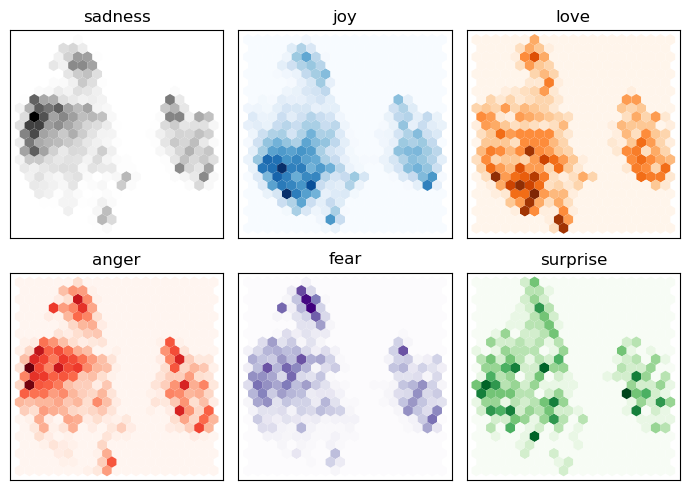

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3, figsize =(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges","Reds","Purples","Greens"]
labels = emotions['train'].features['label'].names

for i, (label,cmap) in enumerate(zip(labels,cmaps)):
    print(i,cmap,label)
    df_emb_sub = df_emb.query(f'label == {i}') # label 의 X,Y 특성
    # print(df_emb_sub)
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,gridsize = 20, linewidths = (0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])    
plt.tight_layout()
plt.show()


---
### 간단한 분류 모델 훈련하기 


In [15]:
from sklearn.linear_model import LogisticRegression

# 수렴을 보장하기 위해 'max_iter'를 증가시킴
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [16]:
print(yellow(f"📌 - logistic 회귀 모델로 분류한 점수: "), red(f"{lr_clf.score(X_valid,y_valid)}"))

📌 - logistic 회귀 모델로 분류한 점수:  0.633


>  Dummy classifier 와 비교하면 얼마나 잘 예측하는지를 알수있다.       
> 예를들어 항상 다수 클래슬 ㄹ예측하거나 랜덤한 클래스를 예측하는 모델을 만듬. 


In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
print(yellow(f"📌 - dummy 모델로 분류한 점수: "), red(f"{dummy_clf.score(X_valid,y_valid)}"))

📌 - dummy 모델로 분류한 점수:  0.352


---
### Confusion matrix  살펴보기

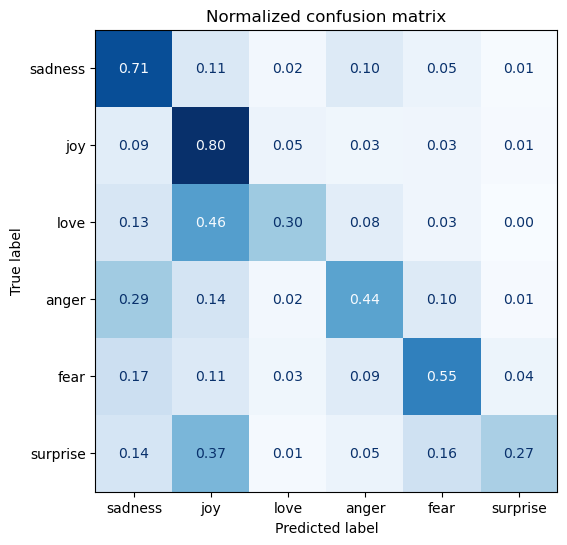

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig,ax = plt.subplots(figsize= (6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax= ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid,labels)


---
### 미세 튜닝
- 특성기반 방식에서 사용한것 과같은 사전훈련모델 (distilBERT)
- AutoModelForSequenceClassifier 사용
- 분류 헤드의 크기를 설정하기 위해 모델이 예측할 ㅅ레이블수 (6개)를 지정함. 

In [19]:
from transformers import AutoModelForSequenceClassification

num_labels  = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


---
### 성공 지표 정의

In [20]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1  = f1_score(labels, preds, average= 'weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}



In [21]:
from huggingface_hub import notebook_login
notebook_login()



In [22]:
!pip install accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [23]:
###  Traning Arguemnt 사용 예 훈련과정에서 생성된 부산물이 저장될 output_dir ,
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded_train) // batch_size
# logging_steps
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments( output_dir= model_name,
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy='epoch',
                                disable_tqdm=False,
                                logging_steps=logging_steps,
                                push_to_hub=True,
                                save_strategy='epoch',
                                load_best_model_at_end=True,
                                log_level='error'
                                )



In [24]:
from transformers import Trainer

trainer = Trainer(model = model , args= training_args,
                  compute_metrics=compute_metrics,
                  train_dataset= emotions_encoded_train,
                  eval_dataset=emotions_encoded_validation,
                  tokenizer=tokenizer)
trainer.train()

  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 0.8105, 'grad_norm': 4.947147369384766, 'learning_rate': 1e-05, 'epoch': 1.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.30503571033477783, 'eval_accuracy': 0.9085, 'eval_f1': 0.9074073321758689, 'eval_runtime': 12.7905, 'eval_samples_per_second': 156.366, 'eval_steps_per_second': 19.546, 'epoch': 1.0}
{'loss': 0.2428, 'grad_norm': 6.702183723449707, 'learning_rate': 0.0, 'epoch': 2.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.21200516819953918, 'eval_accuracy': 0.9265, 'eval_f1': 0.9263824793271942, 'eval_runtime': 10.7042, 'eval_samples_per_second': 186.843, 'eval_steps_per_second': 23.355, 'epoch': 2.0}
{'train_runtime': 639.5083, 'train_samples_per_second': 50.038, 'train_steps_per_second': 0.782, 'train_loss': 0.5266516342163086, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5266516342163086, metrics={'train_runtime': 639.5083, 'train_samples_per_second': 50.038, 'train_steps_per_second': 0.782, 'total_flos': 720342861696000.0, 'train_loss': 0.5266516342163086, 'epoch': 2.0})

  0%|          | 0/250 [00:00<?, ?it/s]

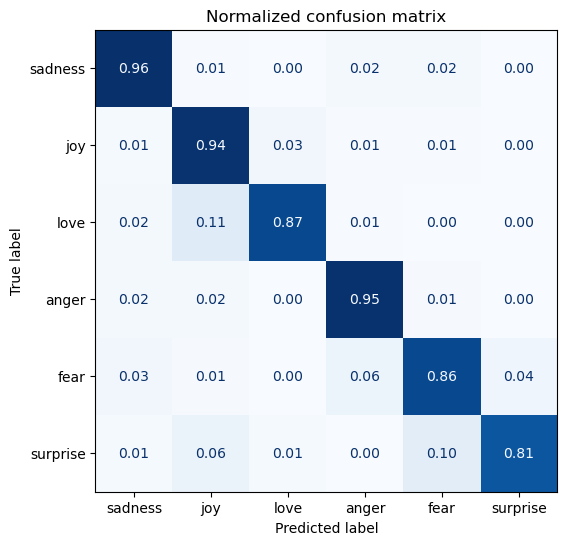

In [25]:
preds_output = trainer.predict(emotions_encoded_validation)
preds_output.metrics

y_preds = np.argmax(preds_output.predictions, axis = 1)
plot_confusion_matrix(y_preds, y_valid, labels)

> 혼동행렬 에 lov, joy 가 조금 혼동 되지만 나머지는 거의 0 에 가깝다. 

---
### keras version 미세 튜닝  p89 참고 

---
### 오류분석 

In [28]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동시킵니다. 
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis = 1)
        loss = cross_entropy(output.logits, batch['label'].to(device),
                            reduction='none')
    # 다른 데이터셋 열과 호환되도록 출력을 CPU 로 옮김.
    return {'loss': loss.cpu().numpy(), 
            'predicted_label': pred_label.cpu().numpy()}
        
## 다시 map method 로 모든 샘플의 손실을 구함. 
emotions_encoded_train.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
emotions_encoded_train.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
emotions_encoded_train.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
# 손실값 제거 
    